# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
# Add format specifier to request url
url = btc_url + "?format=json"
url1 = eth_url +"?format=json"

In [10]:
# Print `data, data1 variable`
requests.get(url)
requests.get(url1)

<Response [200]>

In [11]:
btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)

In [12]:
import json

# Formatting as json
data_btc = btc_data.json()
data_eth = eth_data.json()
print(json.dumps(data_eth, indent=8))
print("---------------------------")
print(json.dumps(data_eth, indent=10))

{
        "data": {
                "1027": {
                        "id": 1027,
                        "name": "Ethereum",
                        "symbol": "ETH",
                        "website_slug": "ethereum",
                        "rank": 2,
                        "circulating_supply": 119319655,
                        "total_supply": 119319655,
                        "max_supply": 0,
                        "quotes": {
                                "USD": {
                                        "price": 2581.02,
                                        "volume_24h": 15709145380,
                                        "market_cap": 307281485822,
                                        "percentage_change_1h": 1.75167425226913,
                                        "percentage_change_24h": 6.79540394389449,
                                        "percentage_change_7d": -18.4884725032027,
                                        "percent_change_1h": 1.75167425226913,


In [13]:
# Fetch current BTC price
btc_price = data_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price

eth_price = data_eth['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45602.40
The current value of your 5.3 ETH is $13679.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:

# Format current date as ISO format
Start_date = pd.Timestamp("2021-01-21", tz="America/Chicago").isoformat()
End_date = pd.Timestamp("2021-01-21", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
today_prices = api.get_barset(
    tickers,
    timeframe,
    start=Start_date,
    end=End_date,
    limit=1000,
).df

# Preview DataFrame
today_prices.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-21 00:00:00-05:00  384.95  383.25  384.2  41800991

In [17]:
# Pick AGG and SPY close prices
agg_close_price = float(today_prices["AGG"]["close"])
spy_close_price = float(today_prices["SPY"]["close"])
# Compute the current value in dollars of the stock portfolio


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.26
Current SPY closing price: $384.2


In [18]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19210.00
The current value of your 200 AGG shares is $23452.00


### Savings Health Analysis

In [29]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
saving_data = [
my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
    
]

# Create savings DataFrame
df_savings =pd.DataFrame(saving_data, columns=["amount"], index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,59281.806
shares,42662.000


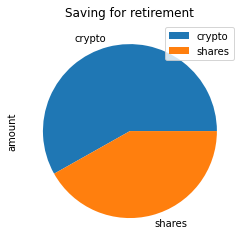

In [28]:
# Plot savings pie chart
pie_plot = df_savings.plot.pie(y="amount", title="Saving for retirement")

In [30]:
combine_saving = df_savings
print(combine_saving)

           amount
crypto  59281.806
shares  42662.000


In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = combine_saving + emergency_fund

# Validate saving health
print(total_saving)

           amount
crypto  95281.806
shares  78662.000


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/chicago').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/chicago').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [30]:
# Printing the simulation input data
MC_thrirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [31]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/wilsonquizhpi/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000261,1.000154,0.993441,0.997993,0.998145,0.999053,0.999647,1.003404,0.998098,1.005827,...,1.000424,0.989981,1.010064,0.998812,1.002568,0.997085,0.999647,0.996004,1.000576,1.002794
2,0.993329,1.002493,0.991484,1.000759,0.996634,1.008420,0.996916,1.008964,0.985096,1.002992,...,0.997792,0.980497,1.012521,0.993439,1.012539,0.987401,1.006105,0.991506,0.993769,0.998044
3,0.994110,1.000678,0.996735,1.006802,0.990930,1.014436,0.989915,1.009258,0.983604,1.011427,...,0.994376,0.990876,1.005351,1.000352,1.019003,0.990903,1.009366,0.986642,0.995938,0.995284
4,0.987534,1.005767,0.998907,1.008547,0.993673,1.021168,0.992328,1.012297,0.981300,1.011593,...,0.994088,0.991789,1.010413,0.999629,1.020247,0.990967,1.002078,0.989061,1.000369,1.001983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.523253,7.184100,6.177846,7.240340,7.814970,7.660774,8.465456,15.426190,5.195832,15.798778,...,5.515225,12.202504,5.962567,9.555807,4.398407,5.004305,2.504204,4.975853,9.371267,11.067352
7557,9.630242,7.174423,6.184708,7.261679,7.789238,7.690322,8.402315,15.437922,5.213143,15.874893,...,5.491134,12.152149,5.974705,9.563868,4.436722,4.961817,2.499324,4.983541,9.410589,11.099219
7558,9.708752,7.150142,6.223116,7.252529,7.840498,7.712543,8.433639,15.446407,5.190732,15.974022,...,5.480739,12.076656,5.992646,9.464961,4.443682,4.936217,2.497554,5.015224,9.400725,11.085227
7559,9.700801,7.107396,6.211307,7.239273,7.865510,7.762651,8.437570,15.515298,5.169791,16.201496,...,5.474312,12.065035,6.018878,9.504768,4.445507,4.932121,2.498948,4.999826,9.380342,10.968493


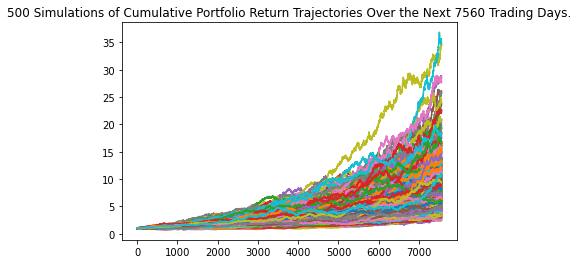

In [32]:
# Plot simulation outcomes
line_plot = MC_thrirtyyear.plot_simulation()

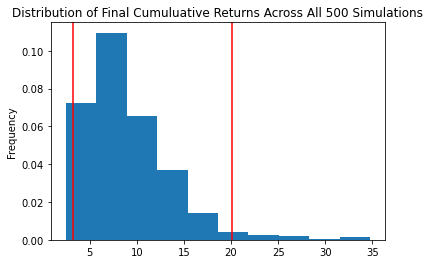

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thrirtyyear.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thrirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              9.002280
std               4.548582
min               2.445541
25%               5.837247
50%               8.025698
75%              10.860960
max              34.769577
95% CI Lower      3.217204
95% CI Upper     20.100083
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64344.09 and $402001.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $96516.13 and $603002.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [38]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/wilsonquizhpi/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998598,1.005535,1.008176,1.003152,0.991967,0.995031,1.002507,1.000940,1.010140,0.986166,...,0.999451,1.006387,1.009196,1.014811,1.005039,0.999437,1.005756,0.987368,0.981435,0.999508
2,0.999877,1.008952,1.009123,1.005815,1.005401,0.978581,1.007561,1.000122,1.009993,0.992374,...,0.994887,0.996717,1.000811,1.008359,1.004490,0.998961,1.009239,0.993838,0.977181,0.994657
3,0.998863,0.997276,1.000226,1.008389,1.009609,0.972087,1.003364,1.002665,1.003766,0.991368,...,0.990236,1.011423,1.011210,1.017233,0.997050,1.015101,1.012606,0.997465,0.967416,0.990180
4,0.994222,1.004628,1.018945,1.023960,1.012063,0.978565,1.004458,1.010664,0.991983,0.993213,...,0.994206,1.008600,1.012735,1.013970,1.000553,1.006679,1.019856,0.995290,0.966662,0.985957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.781845,0.930243,2.392688,1.453103,1.204485,2.166311,1.349850,1.949618,1.280147,2.247545,...,1.800291,2.415895,2.796699,1.411622,1.313730,1.251228,1.901383,2.528596,1.403471,1.658578
1257,1.783948,0.934739,2.386548,1.464949,1.196627,2.167223,1.355501,1.974471,1.279446,2.244909,...,1.801102,2.445809,2.818156,1.401261,1.312191,1.258138,1.909740,2.498811,1.418857,1.677008
1258,1.784348,0.933524,2.373081,1.453547,1.195564,2.166894,1.341427,1.956880,1.286958,2.263218,...,1.813311,2.446720,2.826521,1.398524,1.299100,1.261407,1.912071,2.506927,1.418068,1.697552
1259,1.807595,0.936739,2.353238,1.451548,1.206133,2.166590,1.339865,1.967707,1.273356,2.251979,...,1.807615,2.442097,2.818409,1.406418,1.312030,1.237673,1.913022,2.509234,1.434145,1.692353


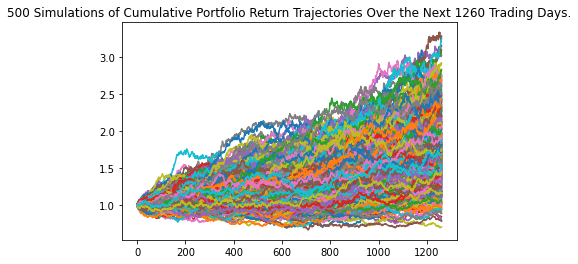

In [40]:
# Plot simulation outcomes
line_plot = MC_fiveyears.plot_simulation()

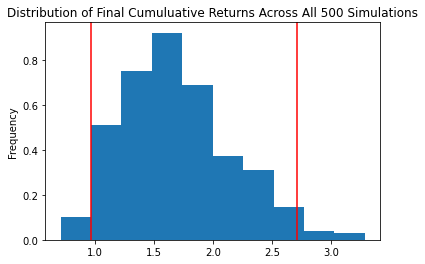

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyears.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl1 = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl1)

count           500.000000
mean              1.696059
std               0.465383
min               0.707997
25%               1.360091
50%               1.642523
75%               1.958312
max               3.288644
95% CI Lower      0.963917
95% CI Upper      2.714900
Name: 1260, dtype: float64


In [56]:
# Set initial investment
initial_investment1 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl1[8]*initial_investment1,2)
ci_upper_five = round(tbl1[9]*initial_investment1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57835.02 and $162893.97


### Ten Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/wilsonquizhpi/uofm-virt-fin-pt-12-2021-u-c/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003789,1.007334,1.004108,1.021016,1.016563,1.014971,0.997915,1.027242,0.997816,1.010422,...,1.016292,1.007794,1.009230,0.998616,1.002763,0.997081,1.002981,0.995830,1.004244,1.002336
2,0.985770,0.999041,1.001874,1.046631,1.018515,1.017569,0.996012,1.023632,0.995435,1.009796,...,1.029327,1.013336,0.996081,0.980620,1.007824,1.009440,1.006989,0.997983,1.004581,1.019411
3,0.995076,0.996538,0.992762,1.041008,1.022121,1.038587,1.005306,1.018404,0.978126,1.019056,...,1.042315,1.008536,0.990574,0.985331,0.997606,1.023991,0.998373,1.001965,0.987701,1.026297
4,0.992289,0.993559,1.005749,1.024544,1.028134,1.019179,1.012913,1.030920,0.974995,0.998045,...,1.031533,0.994245,0.977380,0.984821,0.995013,1.035165,0.998237,0.996792,0.977243,1.014276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.680952,7.679688,1.358374,7.459314,5.869485,23.017307,1.665202,2.795222,1.417287,9.789643,...,2.314553,3.754815,2.765781,8.036637,3.550513,1.464504,6.237058,0.666341,4.942243,2.395904
2517,4.708293,7.845461,1.353386,7.443093,5.905414,23.025886,1.700504,2.795935,1.430583,9.813682,...,2.284649,3.732929,2.826794,8.039715,3.545410,1.470593,6.226521,0.670717,5.012620,2.433064
2518,4.804952,7.888104,1.323946,7.523693,6.004545,22.692077,1.700604,2.746308,1.408089,9.785938,...,2.240509,3.804233,2.795489,7.988598,3.520159,1.477007,6.331646,0.682638,5.148063,2.429559
2519,4.846781,7.778295,1.320220,7.569636,6.009662,22.935253,1.731423,2.790141,1.434310,9.907853,...,2.244589,3.752950,2.881241,7.991685,3.487043,1.476879,6.422836,0.685018,5.096471,2.446886


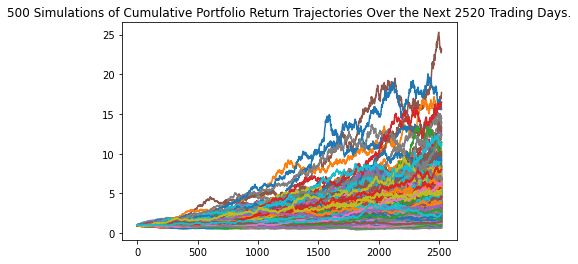

In [60]:
# Plot simulation outcomes
line_plot = MC_tenyears.plot_simulation()


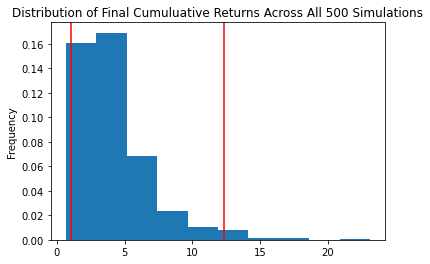

In [61]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyears.plot_distribution()


In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              4.264573
std               2.806581
min               0.649856
25%               2.421898
50%               3.538745
75%               5.239477
max              23.121536
95% CI Lower      1.043776
95% CI Upper     12.303620
Name: 2520, dtype: float64


In [63]:
# Set initial investment

initial_investment2 = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl2[8]*initial_investment2,2)
ci_upper_ten = round(tbl2[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62626.59 and $738217.22
